In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def plotLinear(x, y, g='elbow method'):
    plt.plot(x, y)
    
    if g == 'elbow method':
        plt.ylabel('Cost of Function J')
        plt.xlabel('Number of clusters')

    plt.ylabel(g)
    plt.xlabel('New Cases')
    plt.show()

def setDatsets(mobility, mobilityDF, covidCasesDF):
	df = pd.merge(mobilityDF, covidCasesDF)
	df = df.drop(columns = ['country_region', 'sub_region_1', 'state'])
	df[mobility] = df[mobility].fillna(0)
	df['newCases'] = df['newCases'].fillna(0)
	return df

def normalize(df):
	result = df.copy()
	for feature_name in df.columns:

		if feature_name != 'date':
			max_value = df[feature_name].max()
			min_value = df[feature_name].min()
			result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)

		else:
			continue

	return result

def elbow_method(X, title):
	wcss = []

	for i in range(1, 11):
	    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
	    kmeans.fit(X)
	    wcss.append(kmeans.inertia_)

	plt.plot(range(1, 11), wcss)
	plt.title('Elbow Method - '+ title)
	plt.xlabel('Number of clusters')
	plt.ylabel('WCSS')
	plt.show()

def kmeans(X, n=2, title=" "):
	kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
	pred_y = kmeans.fit_predict(X)

	plt.title('kmeans - '+title)
	plt.scatter(X[title], X['newCases'])
	plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
	plt.show()

def kmeans2(X, n=3, title=" "):
	kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
	pred_y = kmeans.fit_predict(X)

	plt.title('kmeans - '+title)
	plt.scatter(X['principal component 1'], X['principal component 2'])
	plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
	plt.show()

In [4]:
#Google Mobility
gmr_df = pd.read_csv('Global_Mobility_Report.csv')  
gmr_df.head()

categories_google_mobility = ['retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

regions_list_BR = ['Federal District', ' State of Acre','State of Alagoas','State of Amapá', 
 'State of Amazonas', 'State of Bahia', 'State of Ceará', 'State of Espírito Santo', 'State of Goiás', 
 'State of Maranhão', 'State of Mato Grosso', 'State of Mato Grosso do Sul', 'State of Minas Gerais', 
 'State of Pará', 'State of Paraíba', 'State of Paraná', 'State of Pernambuco', 'State of Piauí',  
 'State of Rio de Janeiro', 'State of Rio Grande do Norte', 'State of Rio Grande do Sul', 'State of Rondônia', 
 'State of Roraima', 'State of Santa Catarina',  'State of São Paulo', 'State of Sergipe', 'State of Tocantins']

regions_abbr_BR = [ 'DF','AC','AL','AP','AM','BA','CE','ES','GO','MA','MT','MS','MG','PA',
                    'PB','PR','PE','PI','RJ','RN','RS','RO','RR','SC','SP','SE','TO']

In [3]:
#Covid Cases
covid_df = pd.read_csv('covidcases.csv')
covid_df.head()

col = [ 'epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths', 'newCases', 'totalCases', 
        'deathsMS', 'totalCasesMS', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 
        'deaths_by_totalCases', 
        'recovered', 'suspects', 'tests', 'tests_per_100k_inhabitants', 'vaccinated', 
        'vaccinated_per_100_inhabitants', 'vaccinated_second', 
        'vaccinated_second_per_100_inhabitants', 'vaccinated_single', 'vaccinated_single_per_100_inhabitants']

covidSP = pd.DataFrame(covid_df, columns=['date', 'state', 'newCases'])
covidSP = covidSP.loc[covidSP['state'] == 'SP']

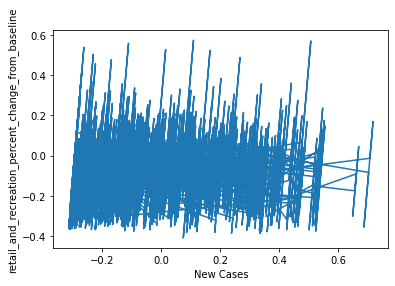

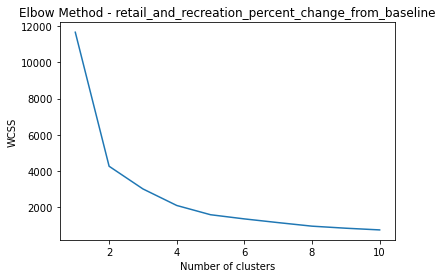

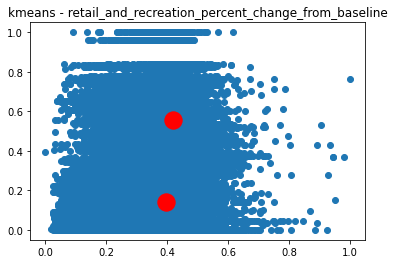

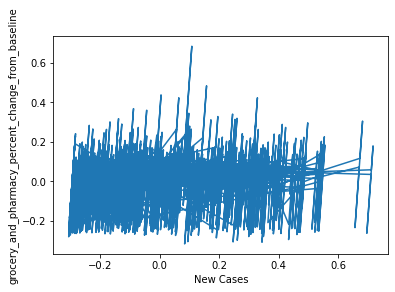

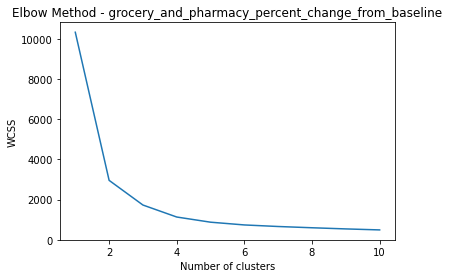

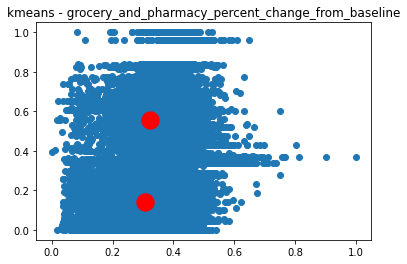

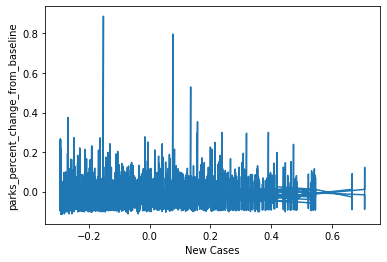

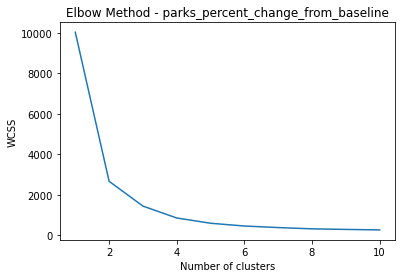

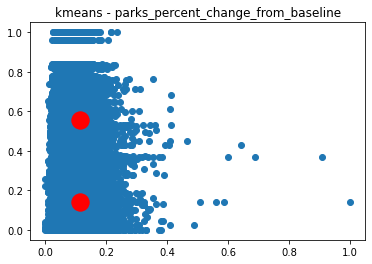

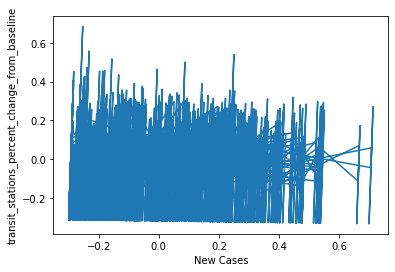

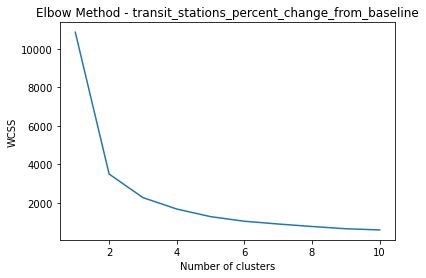

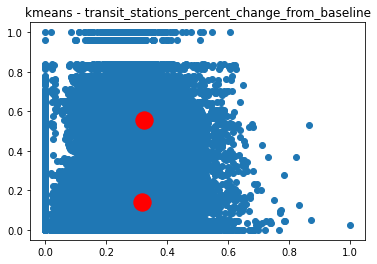

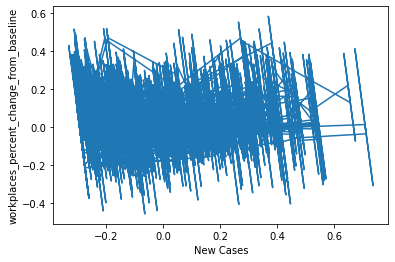

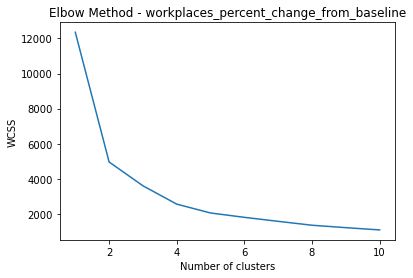

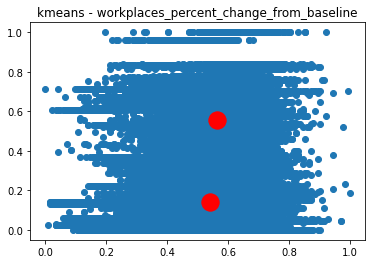

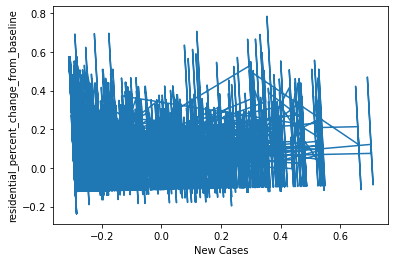

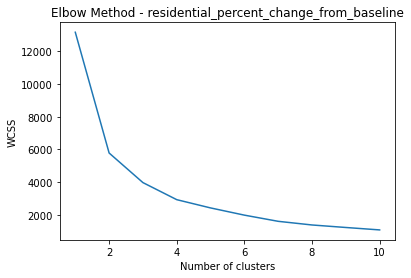

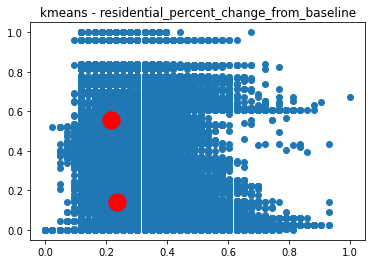

In [5]:
#Juntar conjuntos de dados por novos casos e uma categoria de mobilidade
#Rodar kmeans e PCA para cada uma delas
for g in categories_google_mobility:

	mobility = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', g])
	mobility = mobility.loc[(mobility['country_region'] == 'Brazil') & (mobility['sub_region_1'] == 'State of São Paulo')]
	
	df = setDatsets(g, mobility, covidSP)
	df = normalize(df)

	k = pd.DataFrame(df, columns=[g, 'newCases'])

	pca = PCA(n_components=2)
	principalComponents = pca.fit_transform(k)
	principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

	plotLinear(principalDf['principal component 1'], principalDf['principal component 2'], g)
	elbow_method(k, g)
	kmeans(k, title=g)

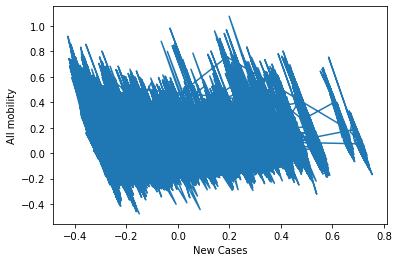

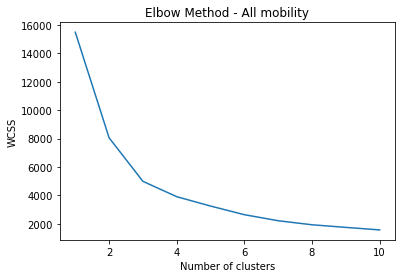

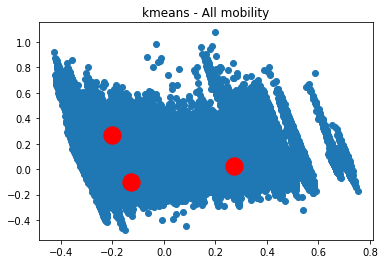

In [8]:
#Kmeans todas categorias
allMobility = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 
	'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
	'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'])
allMobility = allMobility.loc[(allMobility['country_region'] == 'Brazil') & (allMobility['sub_region_1'] == 'State of São Paulo')]
allMobility = pd.merge(allMobility, covidSP)
allMobility = allMobility.drop(columns = ['country_region', 'sub_region_1', 'state', 'date'])

for i in allMobility.columns:
	allMobility[i] = allMobility[i].fillna(0)

allMobility = normalize(allMobility)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(allMobility)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plotLinear(principalDf['principal component 1'], principalDf['principal component 2'], "All mobility")

elbow_method(principalDf, "All mobility")
kmeans2(principalDf, title="All mobility")

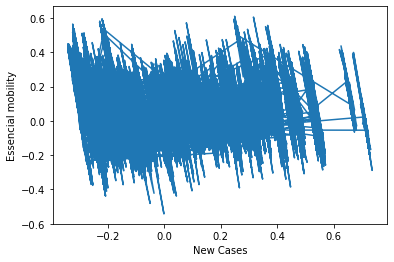

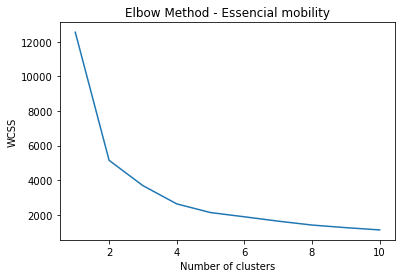

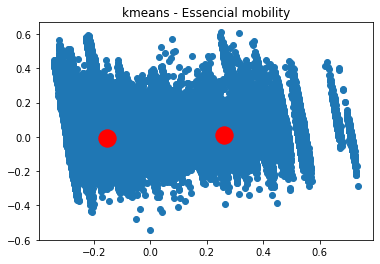

In [9]:
#Kmeans mobility essenciais
mobility1 = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', 
	'grocery_and_pharmacy_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
	'workplaces_percent_change_from_baseline'])
mobility1 = mobility1.loc[(mobility1['country_region'] == 'Brazil') & (mobility1['sub_region_1'] == 'State of São Paulo')]
mobility1 = pd.merge(mobility1, covidSP)
mobility1 = mobility1.drop(columns = ['country_region', 'sub_region_1', 'state', 'date'])

for i in mobility1.columns:
	mobility1[i] = mobility1[i].fillna(0)

mobility1 = normalize(mobility1)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mobility1)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plotLinear(principalDf['principal component 1'], principalDf['principal component 2'], "Essencial mobility")

elbow_method(principalDf, "Essencial mobility")
kmeans2(principalDf, n=2, title="Essencial mobility")

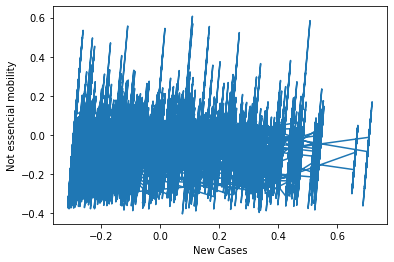

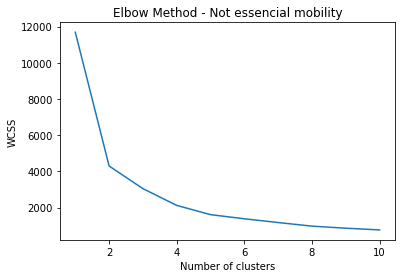

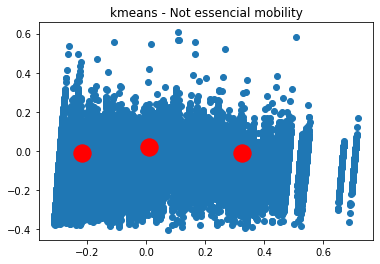

In [10]:
#Kmeans mobility não essenciais
mobility2 = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 
	'parks_percent_change_from_baseline',])
mobility2 = mobility2.loc[(mobility2['country_region'] == 'Brazil') & (mobility2['sub_region_1'] == 'State of São Paulo')]
mobility2 = pd.merge(mobility2, covidSP)
mobility2 = mobility2.drop(columns = ['country_region', 'sub_region_1', 'state', 'date'])

for i in mobility2.columns:
	mobility2[i] = mobility2[i].fillna(0)

mobility2 = normalize(mobility2)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(mobility2)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

plotLinear(principalDf['principal component 1'], principalDf['principal component 2'], "Not essencial mobility")

elbow_method(principalDf, "Not essencial mobility")
kmeans2(principalDf, title="Not essencial mobility")

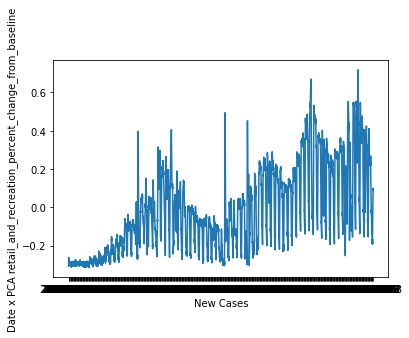

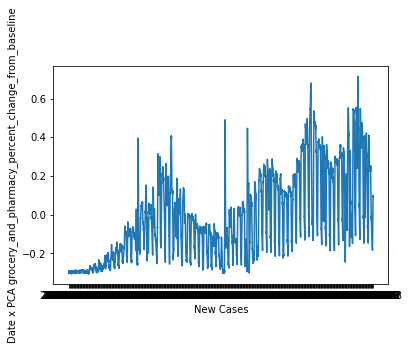

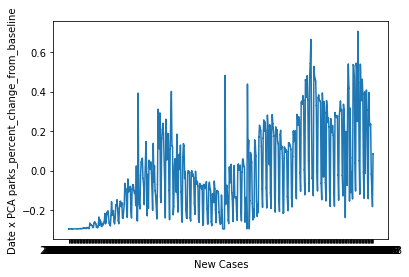

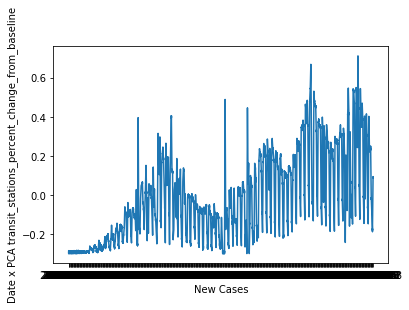

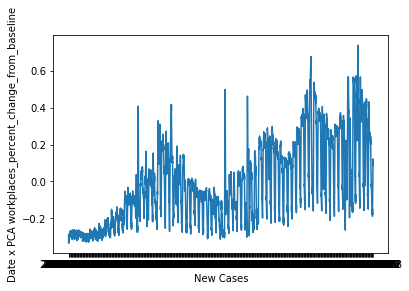

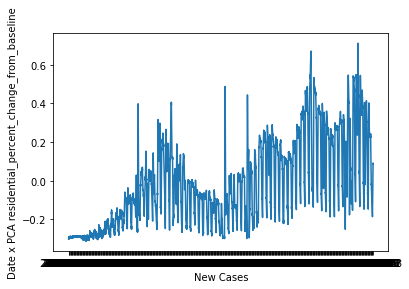

In [11]:
#PCA entre cada mobilidade e número de casos, gráfico por dias
for g in categories_google_mobility:

	mobility = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', g])
	mobility = mobility.loc[(mobility['country_region'] == 'Brazil') & (mobility['sub_region_1'] == 'State of São Paulo')]
	
	df = setDatsets(g, mobility, covidSP)
	df = normalize(df)

	k = pd.DataFrame(df, columns=[g, 'newCases'])

	pca = PCA(n_components=1)
	principalComponents = pca.fit_transform(k)

	plotLinear(df['date'], principalComponents, "Date x PCA " + g)

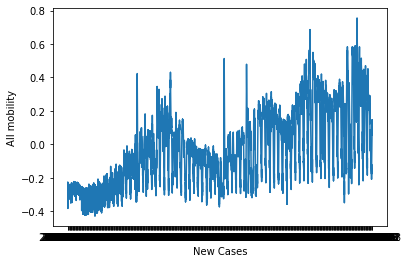

In [12]:
#PCA todas categorias x Datas
allMobility = pd.DataFrame(gmr_df, columns=['country_region', 'sub_region_1', 'date', 'retail_and_recreation_percent_change_from_baseline', 
	'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
	'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'])
allMobility = allMobility.loc[(allMobility['country_region'] == 'Brazil') & (allMobility['sub_region_1'] == 'State of São Paulo')]
allMobility = pd.merge(allMobility, covidSP)
date = pd.DataFrame(data = allMobility, columns = ['date'])
allMobility = allMobility.drop(columns = ['country_region', 'sub_region_1', 'state', 'date'])

for i in allMobility.columns:
	allMobility[i] = allMobility[i].fillna(0)

allMobility = normalize(allMobility)

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(allMobility)

plotLinear(date['date'], principalComponents, "All mobility")